# 1 关联图correlation

## 1.1 散点图

横坐标：面积大小<br />
纵坐标：总人口<br />
图例：一种类型一个颜色

### 1.1.1 导入需要的绘图库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1.2 绘制散点图的函数：plt.scatter()

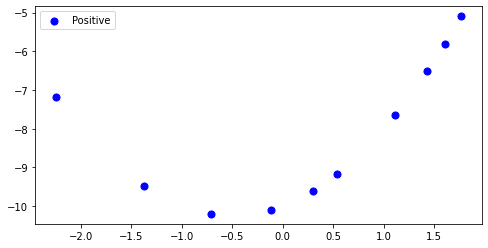

In [2]:
#绘制超简单的散点图：变量x1与x2的关系

#定义数据
x1 = np.random.randn(10) #取出符合正态分布(randn)的10个随机数
x2 = x1 + x1**2 - 10

#确定画布：当只有一个图的时候，不是必须存在
plt.figure(figsize = (8,4)) #长8，高4

#绘图
plt.scatter(x1, x2 #横坐标和纵坐标
            ,s = 50 #点的大小
            ,c = 'blue' #点的颜色
            ,label = 'Positive' #图例
           )

#显示图例
plt.legend()

#显示图形
plt.show()

In [3]:
x1

array([-1.37147633, -2.25162663,  1.60539862,  1.77064702,  1.11476429,
        0.5402463 , -0.12174481, -0.7158139 ,  1.43192044,  0.3027481 ])

In [4]:
x2

array([ -9.49052901,  -7.18180415,  -5.81729666,  -5.0941621 ,
        -7.64253629,  -9.16788764, -10.10692301, -10.20342436,
        -6.5176834 ,  -9.60559549])

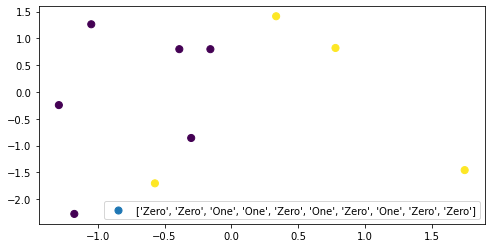

In [5]:
#再试一试一个稍微难一些的：除了两列x之外，还有标签y的存在
#在机器学习中，经常使用标签y作为颜色来观察两种类别的分布需求

X = np.random.randn(10, 2) #10行2列数据集
y = np.array([0,0,1,1,0,1,0,1,0,0]) #标签有两类

plt.figure(figsize = (8,4))

plt.scatter(X[:,0],X[:,1] #横坐标和纵坐标
            ,s = 50 #点的大小
            ,c = y #分类能够被可视化
            ,label = ['Zero','Zero','One','One','Zero','One','Zero','One','Zero','Zero',]
           )

plt.legend()
plt.show()

In [6]:
X

array([[-1.04776255,  1.26409758],
       [-0.30058045, -0.85693055],
       [ 0.33462724,  1.41368095],
       [ 1.74455418, -1.45601119],
       [-1.29000096, -0.24338027],
       [-0.57181882, -1.70286013],
       [-0.38930519,  0.7998763 ],
       [ 0.77852168,  0.82187559],
       [-1.17444607, -2.27321893],
       [-0.15697121,  0.79941387]])

In [7]:
X[:,0]

array([-1.04776255, -0.30058045,  0.33462724,  1.74455418, -1.29000096,
       -0.57181882, -0.38930519,  0.77852168, -1.17444607, -0.15697121])

In [8]:
X[:,1]

array([ 1.26409758, -0.85693055,  1.41368095, -1.45601119, -0.24338027,
       -1.70286013,  0.7998763 ,  0.82187559, -2.27321893,  0.79941387])

In [9]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

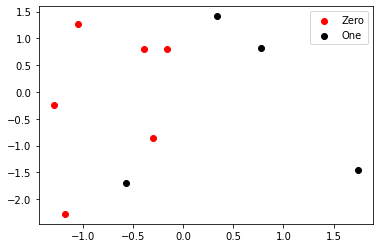

In [10]:
colors = ['red', 'black'] #确立颜色列表
labels = ['Zero', 'One'] #确立标签的类别列表

for i in range(X.shape[1]):
    plt.scatter(X[y==i,0],X[y==i,1]
                ,c = colors[i]
                ,label = labels[i]
                )
#在标签中存在几种类别，就需要循环几次，一次画一个颜色的点
plt.legend()
plt.show()

In [11]:
X[y==i,0]

array([ 0.33462724,  1.74455418, -0.57181882,  0.77852168])

In [12]:
X[y==i,1]

array([ 1.41368095, -1.45601119, -1.70286013,  0.82187559])

### 1.1.3 开始认识绘图所需要的数据

In [13]:
#导入数据
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

In [14]:
#探索数据

In [15]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [16]:
midwest.shape

(332, 29)

In [17]:
midwest.columns

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

In [18]:
['城市ID','郡','州','面积','总人口','人口密度','白人人口','非裔人口','美洲印第安人人口','亚洲人口','其他人种人口','白人所占比例','非裔所占比例','美洲印第安人所占比例','亚洲人所占比例','其他人种比例','成年人口','具有高中文凭的比例','大学文凭比例','有工作的人群比例','已知贫困人口','已知贫困人口的比例','贫困线以下的人的比例','贫困线以下的儿童所占比例','贫困的成年人所占的比例','贫困的老年人所占的比例','是否拥有地铁','标签','点的尺寸']

['城市ID',
 '郡',
 '州',
 '面积',
 '总人口',
 '人口密度',
 '白人人口',
 '非裔人口',
 '美洲印第安人人口',
 '亚洲人口',
 '其他人种人口',
 '白人所占比例',
 '非裔所占比例',
 '美洲印第安人所占比例',
 '亚洲人所占比例',
 '其他人种比例',
 '成年人口',
 '具有高中文凭的比例',
 '大学文凭比例',
 '有工作的人群比例',
 '已知贫困人口',
 '已知贫困人口的比例',
 '贫困线以下的人的比例',
 '贫困线以下的儿童所占比例',
 '贫困的成年人所占的比例',
 '贫困的老年人所占的比例',
 '是否拥有地铁',
 '标签',
 '点的尺寸']

### 1.1.4 准备标签的列表和颜色

标签

In [19]:
midwest['category']

0      AAR
1      LHR
2      AAR
3      ALU
4      AAR
      ... 
327    AAR
328    AAR
329    AAR
330    AAR
331    AAR
Name: category, Length: 332, dtype: object

In [20]:
#提取标签中的类别
categories = np.unique([midwest['category']]) #去掉所有重复的项

In [21]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [22]:
len(categories)

14

颜色：接下来要创造和标签的类别一样多的颜色。如果只有三四个类别，或许我们还可以自己写，然而面对十几个或者二十几个分类，我们需要让matplotlib帮助我们自动生成颜色。

In [23]:
color1 = plt.cm.tab10(5.2)
color1 #四个浮点数组成的一个颜色RGBA(红绿蓝透)

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


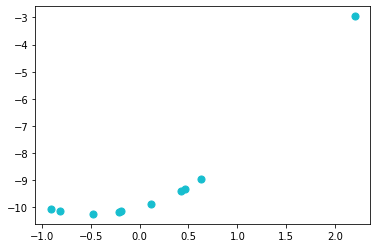

In [24]:
#这个颜色是什么颜色呢？
x1 = np.random.randn(10)
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2
            ,s = 50
            ,c = color1)
plt.show()

In [25]:
np.array(color1)

array([0.09019608, 0.74509804, 0.81176471, 1.        ])

In [26]:
np.array(color1).shape

(4,)

In [27]:
#增维，输入(1,-1)是让行上的维度为1，(-1,1)是让列上的维度为1
np.array(color1).reshape(1,-1)

array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [28]:
np.array(color1).reshape(-1,1)

array([[0.09019608],
       [0.74509804],
       [0.81176471],
       [1.        ]])

In [29]:
np.array(color1).reshape(1,-1).shape

(1, 4)

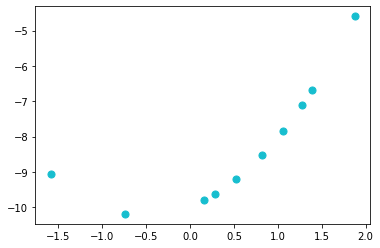

In [30]:
x1 = np.random.randn(10)
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2
            ,s = 50
            ,c = np.array(color1).reshape(1,-1))
plt.show()

### 1.1.5 生成基础的图像

In [31]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [32]:
categories[0]

'AAR'

In [33]:
midwest['category'] == categories[0]

0       True
1      False
2       True
3      False
4       True
       ...  
327     True
328     True
329     True
330     True
331     True
Name: category, Length: 332, dtype: bool

In [34]:
midwest.loc[midwest['category'] == categories[0], 'poptotal'].head()

0    66090
2    14991
4     5836
5    35688
7    16805
Name: poptotal, dtype: int64

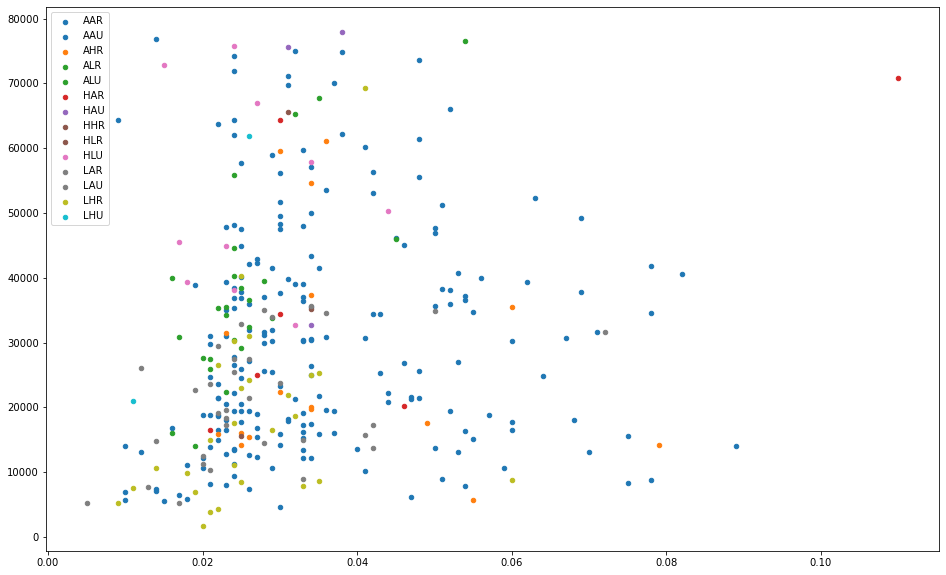

In [35]:
plt.figure(figsize = (16,10))
for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest['category'] == categories[i], 'area']
                ,midwest.loc[midwest['category'] == categories[i], 'poptotal']
                ,s = 20
                ,c = np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label = categories[i]
               )
plt.legend()
plt.show()

In [36]:
#可以先创建好一个颜色的列表，然后使用索引来不断将颜色提取出来
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
#以上是一个列表推导式，它表达的内容和循环非常类似：
colors = []
for i in range(len(categories)):
    colors.append(plt.cm.tab10(i/float(len(categories)-1)))

In [37]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [38]:
enumerate(categories)

In [39]:
[*enumerate(categories)] #标签的索引和类别

[(0, 'AAR'),
 (1, 'AAU'),
 (2, 'AHR'),
 (3, 'ALR'),
 (4, 'ALU'),
 (5, 'HAR'),
 (6, 'HAU'),
 (7, 'HHR'),
 (8, 'HLR'),
 (9, 'HLU'),
 (10, 'LAR'),
 (11, 'LAU'),
 (12, 'LHR'),
 (13, 'LHU')]

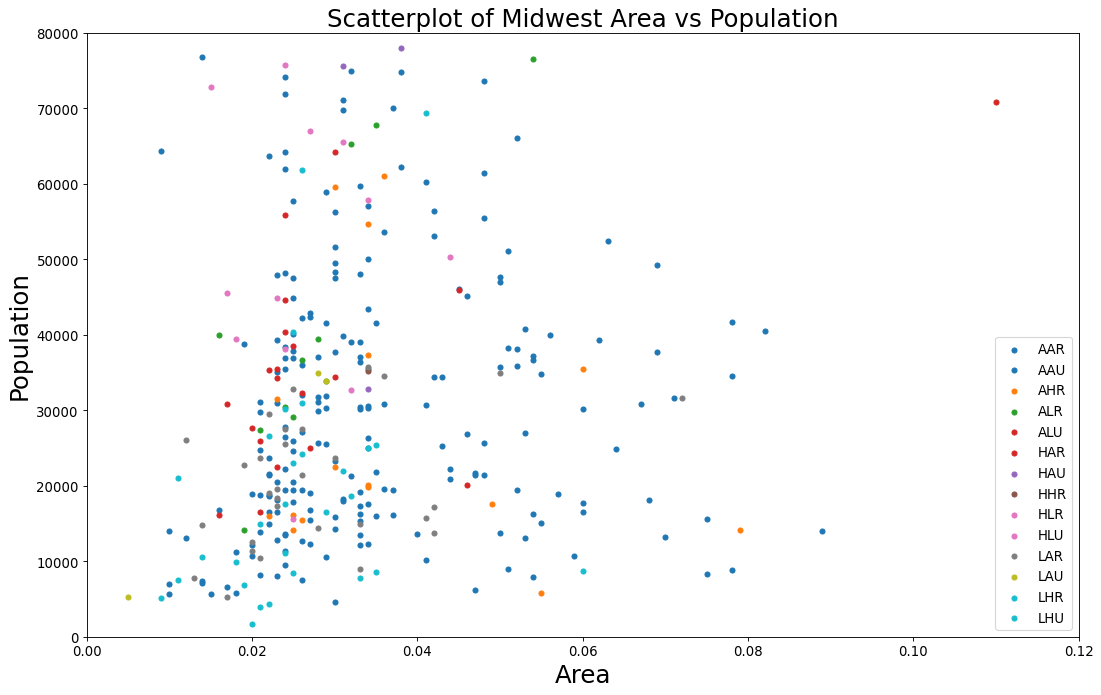

In [40]:
plt.figure(figsize = (16, 10)
           ,dpi= 80
           ,facecolor = 'w'
           ,edgecolor = 'k' #图像的边框颜色，设置为黑色，默认也是黑色
          )
for i, category in enumerate(categories):
    plt.scatter('area','poptotal' #横坐标和纵坐标的列名称
                ,data = midwest.loc[midwest.category == category, :] #取出了所有数据
                ,s = 20
                ,c = np.array(colors[i]).reshape(1,-1)
                ,label = str(category))
plt.gca().set(xlim=(0,0.12), ylim=(0,80000)) #控制横纵坐标的范围
plt.xticks(fontsize = 12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize = 12)
plt.ylabel('Population', fontsize = 22)
plt.xlabel('Area', fontsize = 22)
plt.title('Scatterplot of Midwest Area vs Population', fontsize = 22) #整个图像的标题和字体的大小
plt.legend(fontsize = 12) #图例的字体大小
plt.show()

### 1.1.6 解读图像

In [41]:
midwest[midwest['area'] > 0.1]

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
196,1248,MARQUETTE,MI,0.11,70887,644.427273,68027,1170,943,538,...,6.799415,66398,93.667386,12.608814,14.26216,11.84465,12.523891,0,HAR,171.19829


In [42]:
midwest['category'].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
LAU      3
HAU      3
LHU      2
HLR      2
HHR      1
Name: category, dtype: int64

In [43]:
midwest['c1'] = midwest['category'].apply(lambda x:x[0])
midwest['c2'] = midwest['category'].apply(lambda x:x[1])
midwest['c3'] = midwest['category'].apply(lambda x:x[2])

In [44]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [45]:
midwest['c1'].value_counts() #average, high, low

A    248
L     62
H     22
Name: c1, dtype: int64

In [46]:
midwest['c2'].value_counts()

A    249
H     46
L     37
Name: c2, dtype: int64

In [47]:
midwest['c3'].value_counts()

R    279
U     53
Name: c3, dtype: int64

### 1.1.7 数据处理与逻辑回归

In [48]:
from sklearn.preprocessing import OrdinalEncoder as OE #转化为数字
data = midwest.copy()

In [49]:
data.columns = ['城市ID','郡','州','面积','总人口','人口密度','白人人口','非裔人口','美洲印第安人人口','亚洲人口','其他人种人口','白人所占比例','非裔所占比例','美洲印第安人所占比例','亚洲人所占比例','其他人种比例','成年人口','具有高中文凭的比例','大学文凭比例','有工作的人群比例','已知贫困人口','已知贫困人口的比例','贫困线以下的人的比例','贫困线以下的儿童所占比例','贫困的成年人所占的比例','贫困的老年人所占的比例','是否拥有地铁','标签','点的尺寸','c1','c2','c3']

In [50]:
data.head()

,城市ID,郡,州,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,...,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,标签,点的尺寸,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [51]:
data.iloc[:,-3:].head()

,c1,c2,c3
0,A,A,R
1,L,H,R
2,A,A,R
3,A,L,U
4,A,A,R


In [52]:
data.iloc[:,-3:] = OE().fit_transform(data.iloc[:,-3:])

In [53]:
data.iloc[:,-3:].head() #average=0，L=2，H=1

,c1,c2,c3
0,0.0,0.0,0.0
1,2.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   城市ID          332 non-null    int64  
 1   郡             332 non-null    object 
 2   州             332 non-null    object 
 3   面积            332 non-null    float64
 4   总人口           332 non-null    int64  
 5   人口密度          332 non-null    float64
 6   白人人口          332 non-null    int64  
 7   非裔人口          332 non-null    int64  
 8   美洲印第安人人口      332 non-null    int64  
 9   亚洲人口          332 non-null    int64  
 10  其他人种人口        332 non-null    int64  
 11  白人所占比例        332 non-null    float64
 12  非裔所占比例        332 non-null    float64
 13  美洲印第安人所占比例    332 non-null    float64
 14  亚洲人所占比例       332 non-null    float64
 15  其他人种比例        332 non-null    float64
 16  成年人口          332 non-null    int64  
 17  具有高中文凭的比例     332 non-null    float64
 18  大学文凭比例        332 non-null    

In [55]:
data.dtypes

城市ID              int64
郡                object
州                object
面积              float64
总人口               int64
人口密度            float64
白人人口              int64
非裔人口              int64
美洲印第安人人口          int64
亚洲人口              int64
其他人种人口            int64
白人所占比例          float64
非裔所占比例          float64
美洲印第安人所占比例      float64
亚洲人所占比例         float64
其他人种比例          float64
成年人口              int64
具有高中文凭的比例       float64
大学文凭比例          float64
有工作的人群比例        float64
已知贫困人口            int64
已知贫困人口的比例       float64
贫困线以下的人的比例      float64
贫困线以下的儿童所占比例    float64
贫困的成年人所占的比例     float64
贫困的老年人所占的比例     float64
是否拥有地铁            int64
标签               object
点的尺寸            float64
c1              float64
c2              float64
c3              float64
dtype: object

In [56]:
data.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

In [57]:
data.dtypes.values != 'O'

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

In [58]:
data = data.loc[:, data.dtypes.values != 'O']

In [59]:
#把所有整数类型的列转化为浮点数类型
for i in range(data.loc[:, data.dtypes.values != 'int64'].shape[1]):
    data.loc[i, data.dtypes.values == 'int64'] = data.loc[i, data.dtypes.values == 'int64'].apply(lambda x:float(x))

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   城市ID          332 non-null    float64
 1   面积            332 non-null    float64
 2   总人口           332 non-null    float64
 3   人口密度          332 non-null    float64
 4   白人人口          332 non-null    float64
 5   非裔人口          332 non-null    float64
 6   美洲印第安人人口      332 non-null    float64
 7   亚洲人口          332 non-null    float64
 8   其他人种人口        332 non-null    float64
 9   白人所占比例        332 non-null    float64
 10  非裔所占比例        332 non-null    float64
 11  美洲印第安人所占比例    332 non-null    float64
 12  亚洲人所占比例       332 non-null    float64
 13  其他人种比例        332 non-null    float64
 14  成年人口          332 non-null    float64
 15  具有高中文凭的比例     332 non-null    float64
 16  大学文凭比例        332 non-null    float64
 17  有工作的人群比例      332 non-null    float64
 18  已知贫困人口        332 non-null    

In [61]:
X = data.iloc[:, 1:-3] #-3或-4均可(点的尺寸可要可不要)
X.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.052,66090.0,1270.961540,63917.0,1702.0,98.0,249.0,124.0,96.712059,2.575276,...,19.631392,4.355859,63628.0,96.274777,13.151443,18.011717,11.009776,12.443812,0.0,250.944411
1,0.014,10626.0,759.000000,7054.0,3496.0,19.0,48.0,9.0,66.384340,32.900433,...,11.243308,2.870315,10529.0,99.087145,32.244278,45.826514,27.385647,25.228976,0.0,185.781260
2,0.022,14991.0,681.409091,14477.0,429.0,35.0,16.0,34.0,96.571276,2.861717,...,17.033819,4.488572,14235.0,94.956974,12.068844,14.036061,10.852090,12.697410,0.0,175.905385
3,0.017,30806.0,1812.117650,29344.0,127.0,46.0,150.0,1139.0,95.254171,0.412257,...,17.278954,4.197800,30337.0,98.477569,7.209019,11.179536,5.536013,6.217047,1.0,319.823487
4,0.018,5836.0,324.222222,5264.0,547.0,14.0,5.0,6.0,90.198766,9.372858,...,14.475999,3.367680,4815.0,82.505140,13.520249,13.022889,11.143211,19.200000,0.0,130.442161


In [62]:
y = data.iloc[:,-3:]
y.head()

,c1,c2,c3
0,0.0,0.0,0.0
1,2.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0


In [63]:
#分训练集和测试集
from sklearn.model_selection import train_test_split as TTS
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size = 0.3, random_state = 420)

In [64]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
276,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
156,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
35,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
161,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
321,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [65]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [66]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
1,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
2,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
3,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
4,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [67]:
[*range(23),-1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 -1]

In [68]:
Xtrain.iloc[:,[*range(23),-1]].head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,具有高中文凭的比例,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,点的尺寸
0,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,66.980137,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,137.858283
1,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,77.877321,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,187.881402
2,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,78.767251,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,305.082769
3,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,76.380796,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,163.839599
4,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,73.739583,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,112.022528


In [69]:
#标准化数据集(线性模型的核心需求)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(Xtrain.iloc[:,[*range(23),-1]]) #以训练集为标准的均值和方差

In [70]:
Xtrain_ = Xtrain.copy()
Xtest_ = Xtest.copy()

In [71]:
Xtrain_.iloc[:,[*range(23),-1]] = ss.transform(Xtrain.iloc[:,[*range(23),-1]])
Xtest_.iloc[:,[*range(23),-1]] = ss.transform(Xtest.iloc[:,[*range(23),-1]])

In [72]:
Xtrain_.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.616975,-0.781589,-0.817515,-0.806262,-0.109249,-0.024001,-0.298458,-0.020924,-0.560519,0.359059,...,-0.879865,-0.848804,-0.824188,-1.455058,0.342460,0.839258,0.428156,-0.582661,0.0,-0.817515
1,-0.141464,-0.374282,-0.347133,-0.350269,-0.486592,-0.330845,-0.368263,-0.341073,0.588691,-0.457448,...,-0.002157,0.773189,-0.351151,0.550676,-1.033914,-1.207832,-0.982892,-0.331241,0.0,-0.347133
2,0.272230,1.656180,0.754945,1.269442,5.927225,-0.089461,9.576664,1.267678,-3.784901,3.098491,...,4.233941,5.988182,1.400655,-2.735690,3.192365,1.430564,4.211672,0.486112,0.0,0.754945
3,-0.072515,-0.647145,-0.573205,-0.643865,-0.465347,0.327847,-0.447376,-0.393097,0.281709,-0.417052,...,0.516478,0.684514,-0.633180,0.522436,0.092918,0.327251,0.176721,-0.731545,0.0,-0.573205
4,3.237036,-0.862212,-1.060456,-0.976797,-0.470405,8.330347,-0.489259,-0.445122,-4.025610,-0.416897,...,0.285901,0.116079,-0.859890,0.302219,1.591667,1.818087,1.591028,0.593332,0.0,-1.060456


In [73]:
#使用逻辑回归探索数据
from sklearn.linear_model import LogisticRegression as logiR
import pandas as pd

for i in range(3): #三次建模，每次建模的y不同
    logi = logiR(solver='newton-cg', max_iter = 100*20, multi_class = 'multinomial').fit(Xtrain_, Ytrain.iloc[:,i].ravel())
    print(y.columns[i])
    print('Train:{}'.format(logi.score(Xtrain_, Ytrain.iloc[:,i].ravel()))) #模型的学习能力
    print('Test:{}'.format(logi.score(Xtrain_, Ytrain.iloc[:,i].ravel()))) #模型的泛化能力
    coeff = pd.DataFrame(logi.coef_).T
    if i != 2:
        coeff['mean'] = coeff.iloc[:,:-1].mean(axis = 1)
        coeff['name'] = Xtrain.columns
        coeff.columns = ['Average', 'High', 'Low', 'mean', 'name']
    else:
        coeff['name'] = Xtrain.columns
        coeff.columns = ['Coef', 'mean']
    print(coeff.sort_values(by = 'mean', ascending = False).head())
    print('\t')

c1
Train:0.9956896551724138
Test:0.9956896551724138
     Average      High       Low      mean       name
14  1.274035  2.189743 -3.463778  1.731889  具有高中文凭的比例
15 -0.656186  1.390281 -0.734095  0.367047     大学文凭比例
16 -0.363926  0.899042 -0.535116  0.267558   有工作的人群比例
5   0.168316  0.007686 -0.176003  0.088001   美洲印第安人人口
7   0.015589  0.106681 -0.122271  0.061135     其他人种人口
	
c2
Train:0.978448275862069
Test:0.978448275862069
     Average      High       Low      mean          name
20  0.248239  1.652407 -1.900646  0.950323  贫困线以下的儿童所占比例
19  0.054842  1.639717 -1.694559  0.847279    贫困线以下的人的比例
21 -0.249106  1.694901 -1.445795  0.722897   贫困的成年人所占的比例
22 -0.105854  0.797378 -0.691524  0.345762   贫困的老年人所占的比例
5   0.256889  0.219229 -0.476118  0.238059      美洲印第安人人口
	
c3
Train:1.0
Test:1.0
        Coef          mean
0  -0.203313            面积
9  -0.027313        非裔所占比例
4  -0.064857          非裔人口
20 -0.067184  贫困线以下的儿童所占比例
19 -0.052510    贫困线以下的人的比例
	


In [74]:
#结论：
#第一个字母是平均教育程度的高低（越高的话，标签是H）
#第二个字母是贫困水平的高低（越穷的话，标签是H）
#第三个字母是城市还是乡村

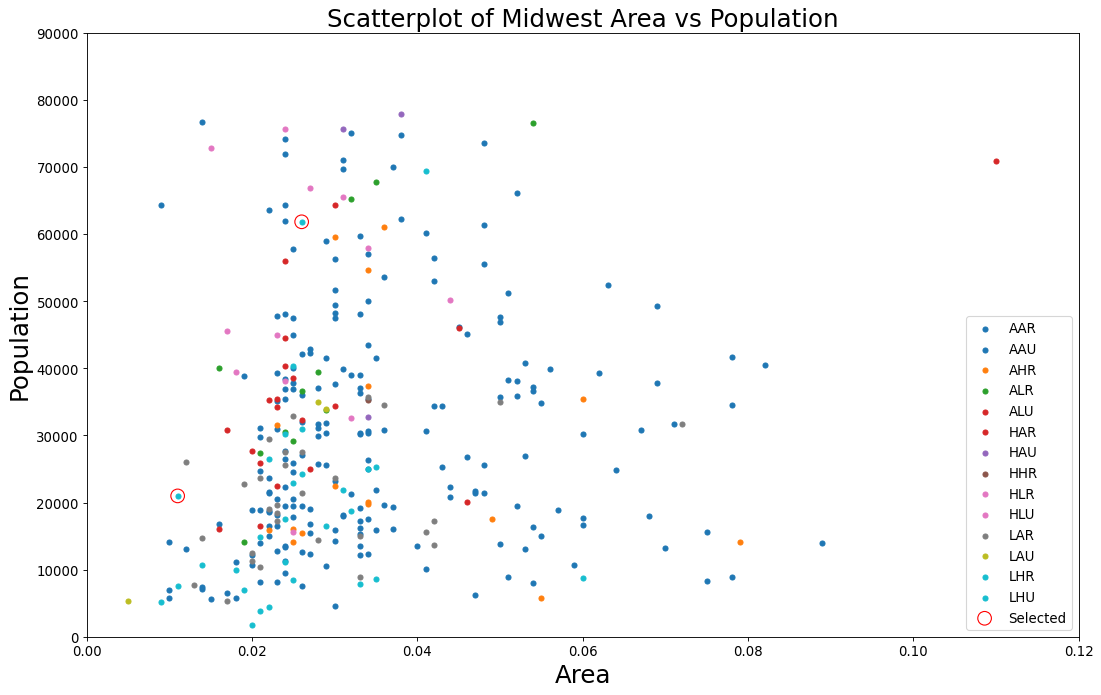

In [77]:
plt.figure(figsize = (16, 10)
           ,dpi= 80
           ,facecolor = 'w'
           ,edgecolor = 'k' #图像的边框颜色，设置为黑色，默认也是黑色
          )
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal'
                ,data = midwest.loc[midwest.category == category, :]
                ,s = 20
                ,c = np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1)
                ,label = str(category))
#低学历，很贫困的地方
plt.scatter('area', 'poptotal'
            ,data = midwest.loc[midwest.category == 'LHU',:]
            ,s = 150
            ,facecolors = 'None' #点的填充颜色，为None的时候，表示点是透明的
            ,edgecolors = 'red'
            ,label = 'Selected')
plt.gca().set(xlim = (0.0,0.12), ylim = (0,90000))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Population', fontsize=22)
plt.xlabel('Area', fontsize=22)
plt.title('Scatterplot of Midwest Area vs Population', fontsize=22)
plt.legend(fontsize=12)
plt.show()
#高学历，低贫困的地方：HLU